In [7]:
from utils.agent import *
from utils.dataset import read_voc_dataset, read_voc_test
from IPython.display import clear_output
import matplotlib.pyplot as plt
import tqdm.notebook as tq
import numpy as np
%reload_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'torch'

## 1. Load dataset and visualize

In [10]:
train_loader2007, val_loader2007 = read_voc_dataset(path="." ,year='2007')
# train_loader2012, val_loader2012 = read_voc_dataset(path="." ,year='2012')
# voc_test = read_voc_test(path='.', year='2007')

Using downloaded and verified file: ./VOCtrainval_06-Nov-2007.tar
Extracting ./VOCtrainval_06-Nov-2007.tar to .
Using downloaded and verified file: ./VOCtrainval_06-Nov-2007.tar
Extracting ./VOCtrainval_06-Nov-2007.tar to .


In [11]:
datasets_per_class = sort_class_extract([train_loader2007])

  0%|          | 0/2501 [00:00<?, ?it/s]

In [12]:
cat_dataset = datasets_per_class['cat']
len(cat_dataset)

166

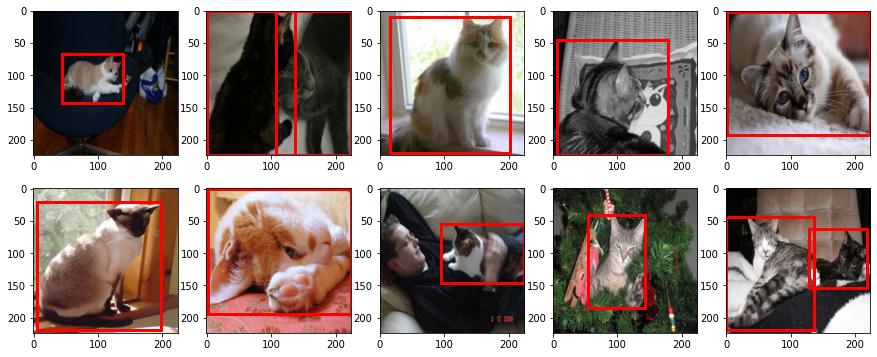

In [41]:
t = 1
plt.figure(figsize=[15,6])
indexes = []
for i in list(cat_dataset.keys())[:10]:
    indexes.append(i)
    image = cat_dataset[i][0][0]
    plt.subplot(2,5,t)
    plt.imshow(image.permute([1,2,0]))
    
    for j in range(1,len(cat_dataset[i][0])):
        gt = cat_dataset[i][0][j][0]
        image_size = cat_dataset[i][0][j][1]
    
        origin_width, origin_height = int(image_size['width']), int(image_size['height'])
        real_width, real_height = 224, 224
        width_ratio, height_ratio = real_width/origin_width, real_height/origin_height

        bdbox = np.array([gt['xmin'], gt['ymin'], gt['xmax'], gt['ymax']]).astype('float')
        bdbox = (bdbox * [width_ratio, height_ratio, width_ratio, height_ratio]).astype('int')

    
        plt.gca().add_patch(plt.Rectangle((bdbox[0], bdbox[1]), 
                                          bdbox[2]-bdbox[0], bdbox[3]-bdbox[1], 
                                          fill=False, edgecolor='r', linewidth=3))
    t += 1

## 2. Training

In [47]:
loss_list = None
for i in tq.tqdm(range(len(classes))):
    classe = classes[i]
    print("Classe "+str(classe)+"...")
    agent = Agent(classe, alpha=0.2, num_episodes=10, load=False, model_name='vgg16')
    agent.train(datasets_per_class[classe], verbose=False)
    loss_list = agent.loss_record
    del agent
    torch.cuda.empty_cache()

  0%|          | 0/1 [00:00<?, ?it/s]

Classe cat...
Episode 0
Saved
Complete
Episode 1
Saved
Complete
Episode 2
Saved
Complete
Episode 3
Saved
Complete
Episode 4
Saved
Complete
Episode 5
Saved
Complete
Episode 6
Saved
Complete
Episode 7
Saved
Complete
Episode 8
Saved
Complete
Episode 9
Saved
Complete


## 3. Test

### Test on training set

In [7]:
# construct an agent
from utils.tools import classes
model_name='vgg16'
classe = random.choice(classes)
agent = Agent(classe, load=True, model_name=model_name)

Iteration:1 - Action:3 - Position:[0, 224, 0, 179.2]
Iteration:2 - Action:0 - Position:[0, 224, 0, 179.2]
Iteration:1 - Action:4 - Position:[0, 224, 44.800000000000004, 224]
Iteration:2 - Action:4 - Position:[0, 224, 80.64, 224]
Iteration:3 - Action:4 - Position:[0, 224, 109.31200000000001, 224]
Iteration:4 - Action:4 - Position:[0, 224, 132.24960000000002, 224]
Iteration:5 - Action:1 - Position:[44.800000000000004, 224, 132.24960000000002, 224]
Iteration:6 - Action:1 - Position:[80.64, 224, 132.24960000000002, 224]
Iteration:7 - Action:1 - Position:[109.31200000000001, 224, 132.24960000000002, 224]
Iteration:8 - Action:5 - Position:[86.37440000000001, 224, 113.89952000000002, 224]
Iteration:9 - Action:4 - Position:[86.37440000000001, 224, 135.91961600000002, 224]
Iteration:10 - Action:1 - Position:[113.89952000000001, 224, 135.91961600000002, 224]
Iteration:11 - Action:5 - Position:[91.87942400000001, 224, 118.30353920000002, 224]
Iteration:12 - Action:4 - Position:[91.87942400000001,

/home/ecbm4040/6885 Project/DRL-Object-Detection/utils/tools.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(1)


Iteration:1 - Action:4 - Position:[0, 194, 38.800000000000004, 224]
Iteration:2 - Action:4 - Position:[0, 194, 75.84, 224]
Iteration:3 - Action:7 - Position:[0, 194, 105.47200000000001, 194.368]
Iteration:4 - Action:4 - Position:[0, 194, 123.25120000000001, 212.1472]
Iteration:5 - Action:5 - Position:[0, 224, 105.47200000000001, 224]
Iteration:6 - Action:4 - Position:[0, 224, 129.1776, 224]
Iteration:7 - Action:1 - Position:[44.800000000000004, 224, 129.1776, 224]
Iteration:8 - Action:1 - Position:[80.64, 224, 129.1776, 224]
Iteration:9 - Action:1 - Position:[109.31200000000001, 224, 129.1776, 224]
Iteration:10 - Action:5 - Position:[86.37440000000001, 224, 110.21312000000002, 224]
Iteration:11 - Action:4 - Position:[86.37440000000001, 224, 132.97049600000003, 224]
Iteration:12 - Action:1 - Position:[113.89952000000001, 224, 132.97049600000003, 224]
Iteration:13 - Action:1 - Position:[135.91961600000002, 224, 132.97049600000003, 224]
Iteration:14 - Action:5 - Position:[118.303539200000

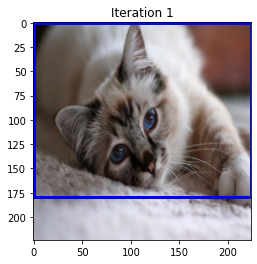

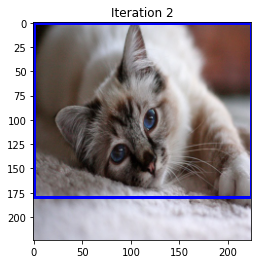

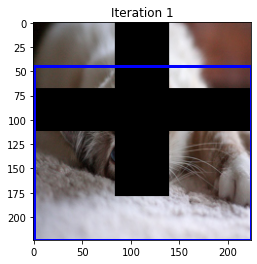

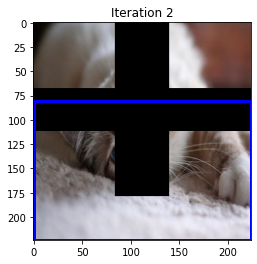

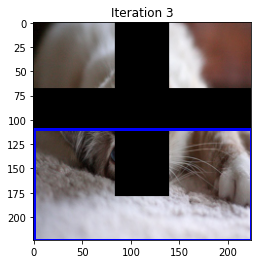

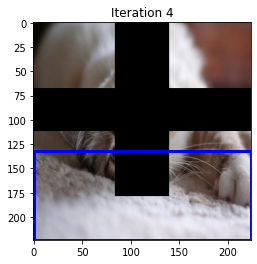

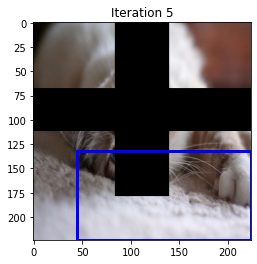

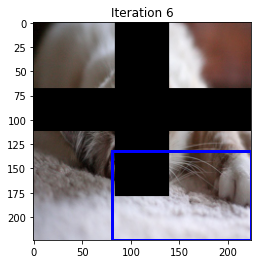

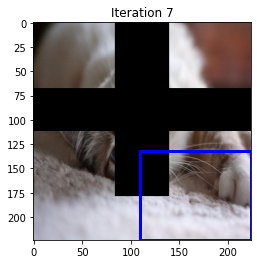

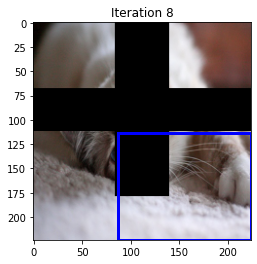

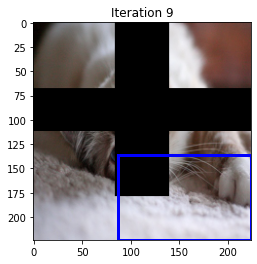

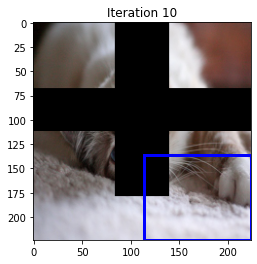

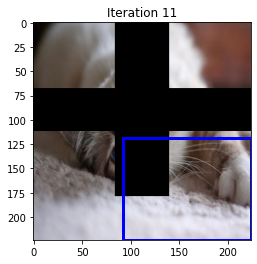

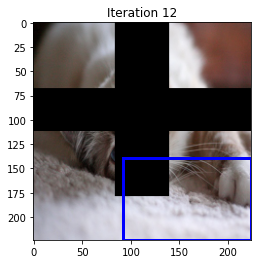

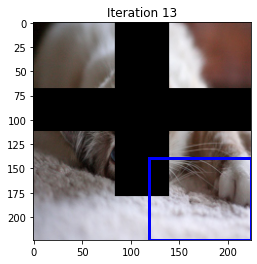

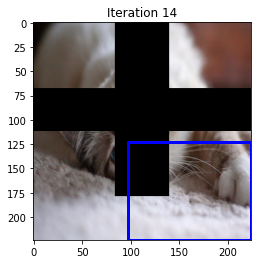

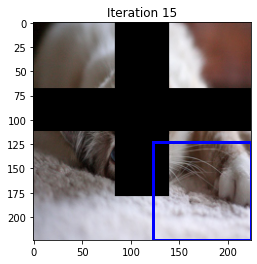

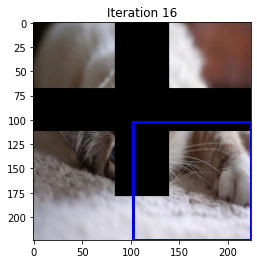

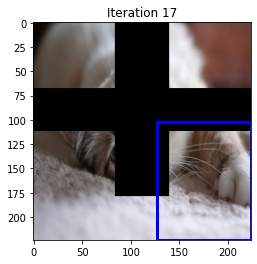

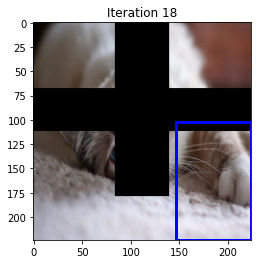

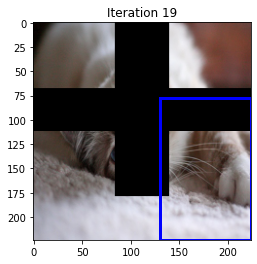

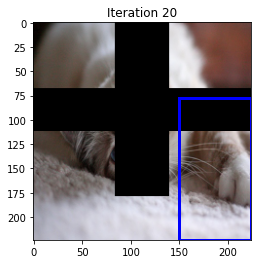

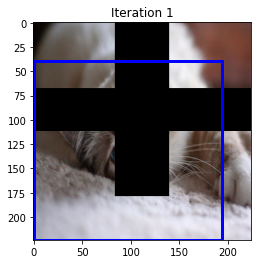

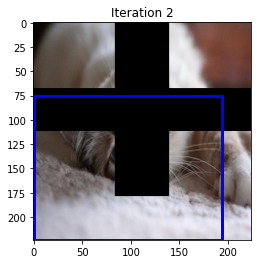

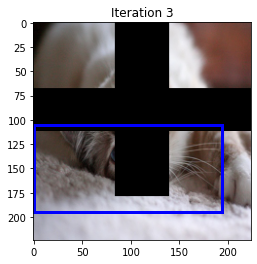

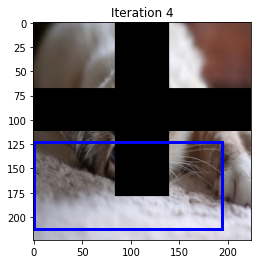

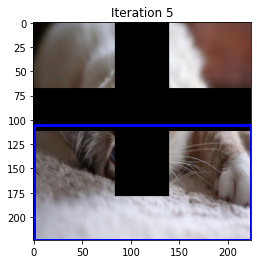

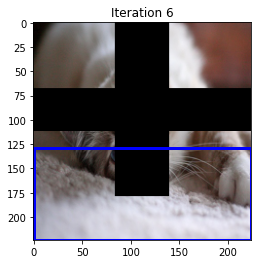

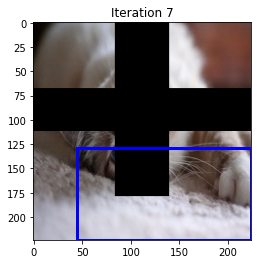

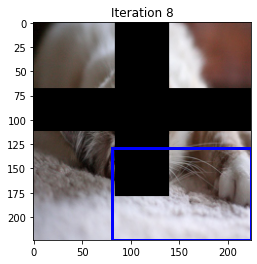

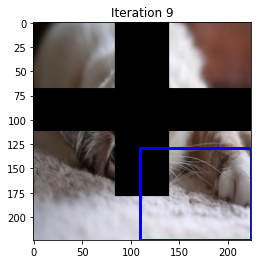

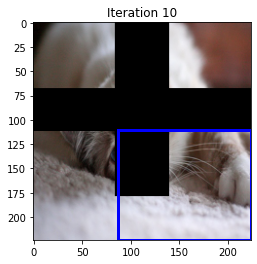

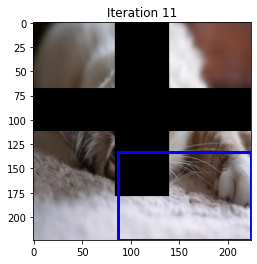

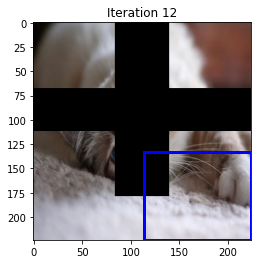

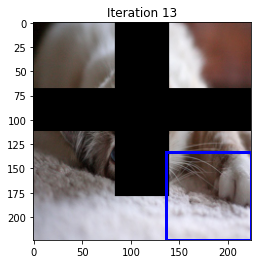

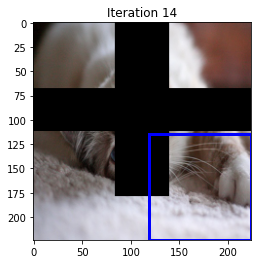

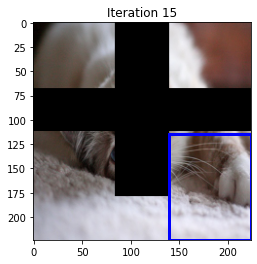

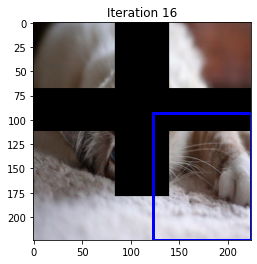

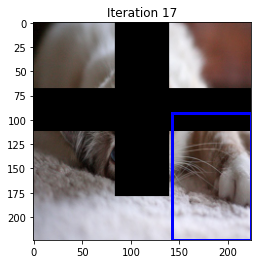

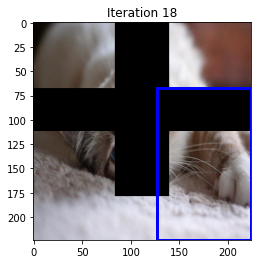

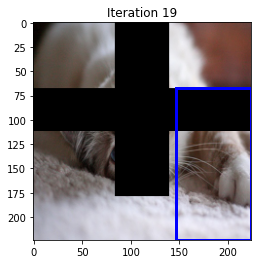

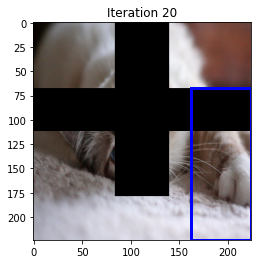

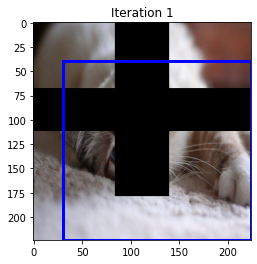

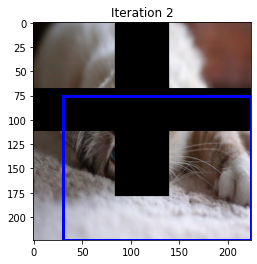

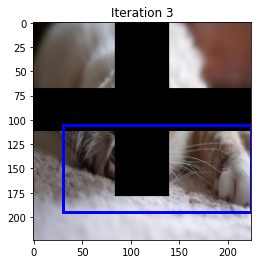

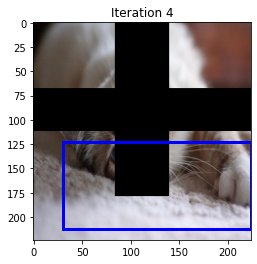

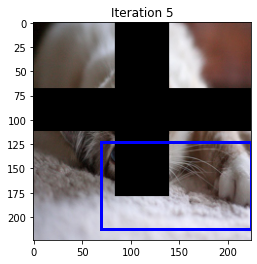

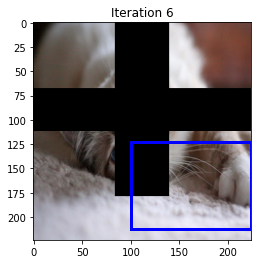

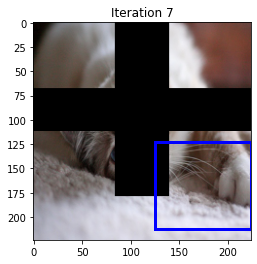

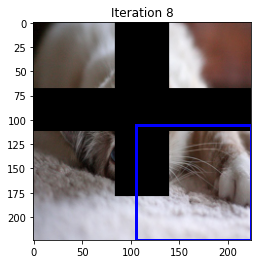

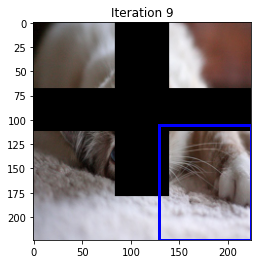

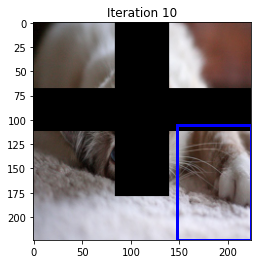

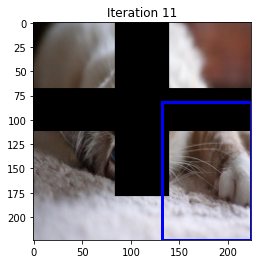

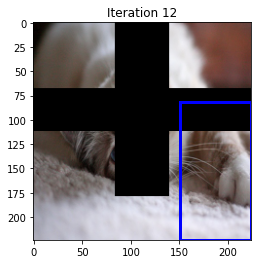

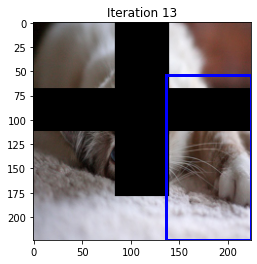

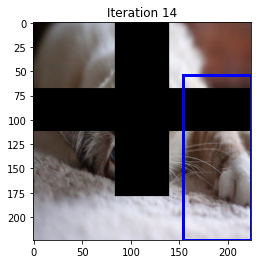

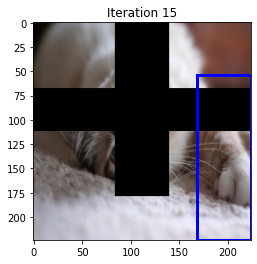

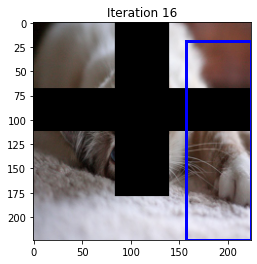

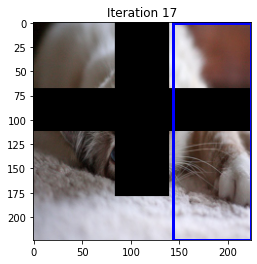

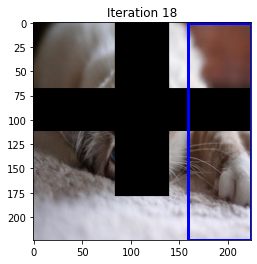

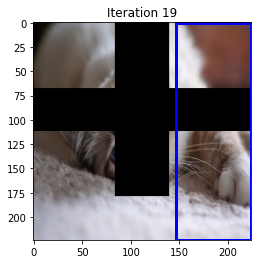

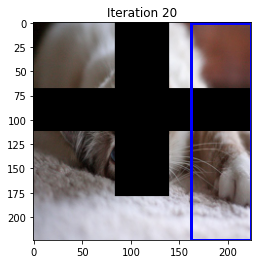

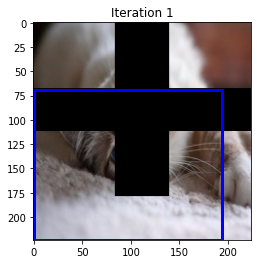

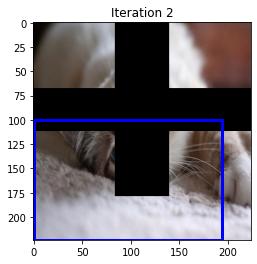

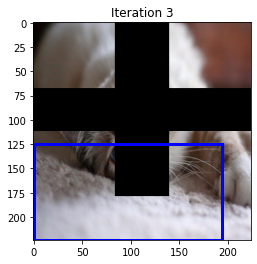

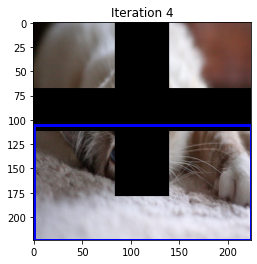

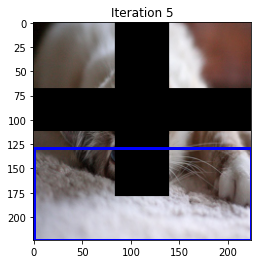

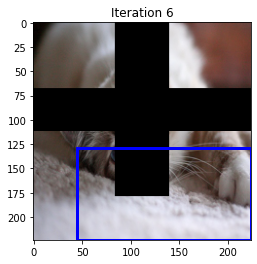

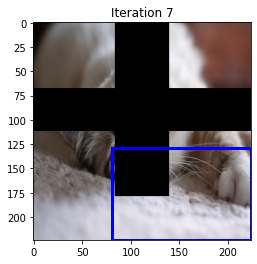

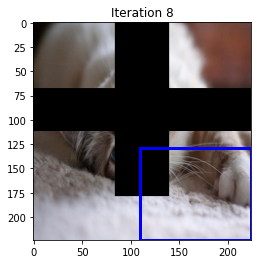

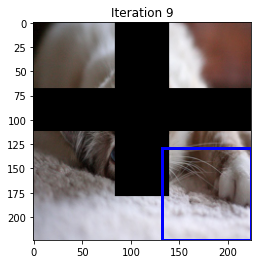

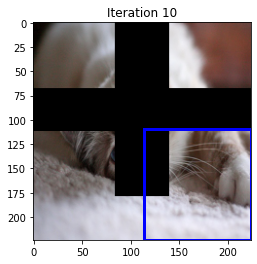

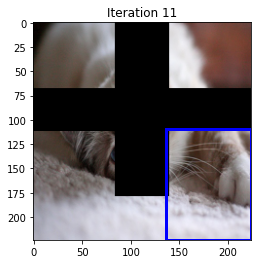

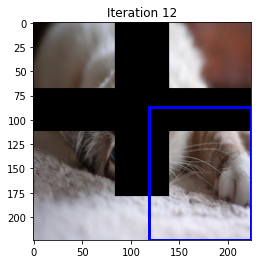

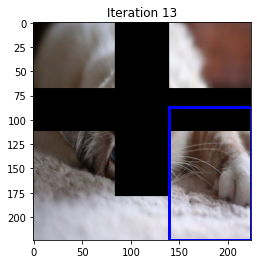

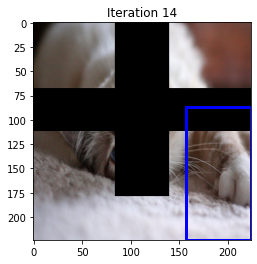

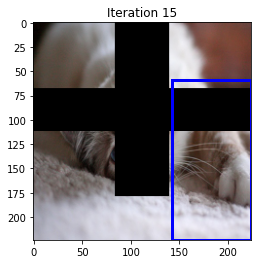

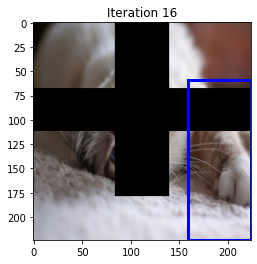

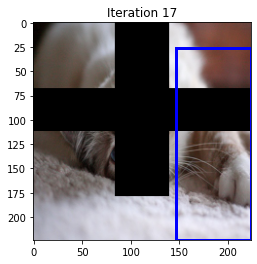

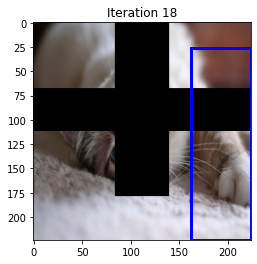

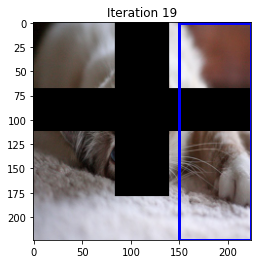

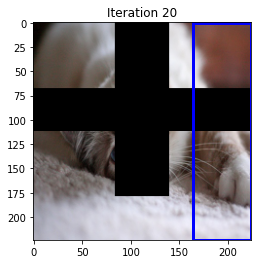

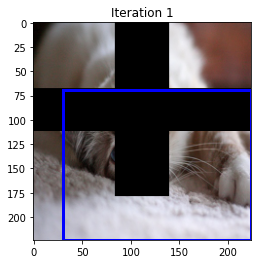

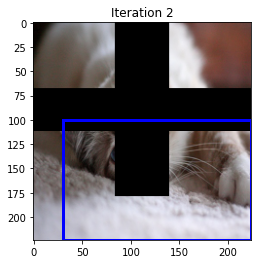

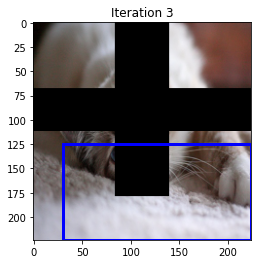

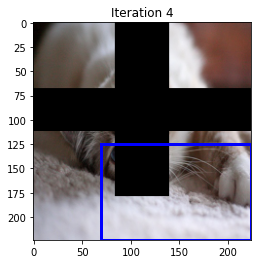

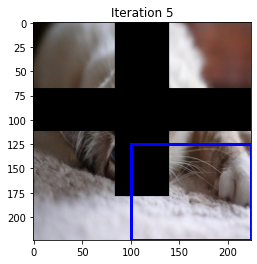

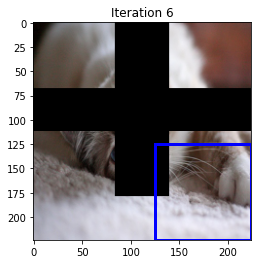

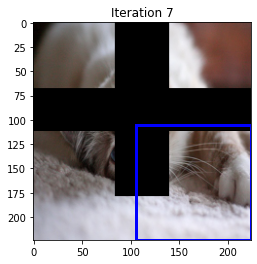

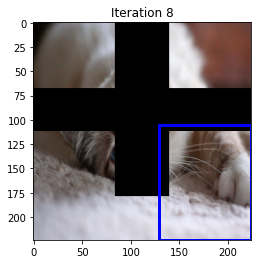

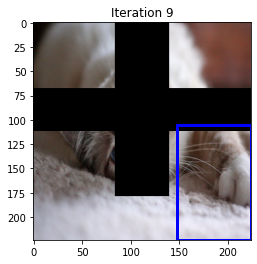

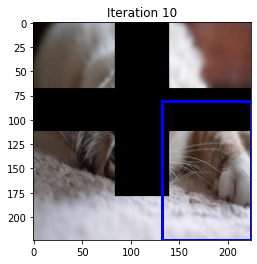

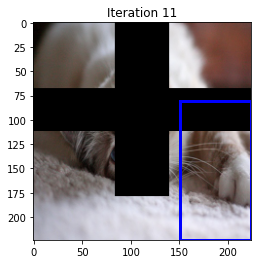

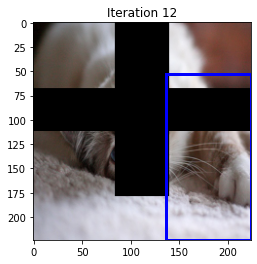

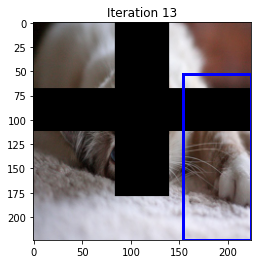

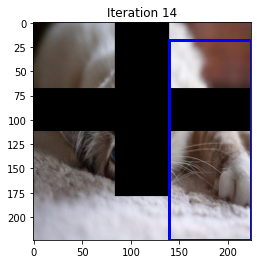

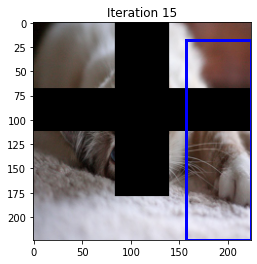

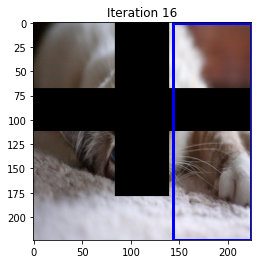

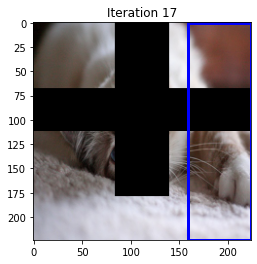

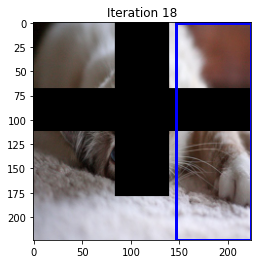

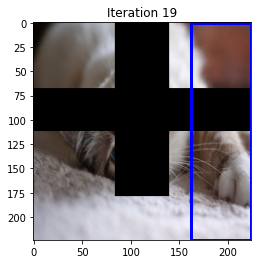

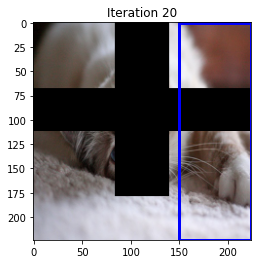

In [8]:
# Test on signle picture to visualize the process of prediction
i = 4
for index in indexes[i:i+1]:
    image, gt_boxes = extract(index, datasets_per_class[classe])
    bdboxes = agent.predict_multiple_objects(image, plot=True, verbose=True)

In [9]:
# Test on whole dataset to get result metrics
torch.cuda.empty_cache()
results = {}
for i in classes:
    results[i] = []
model_name='vgg16'
for i in tq.tqdm(range(len(classes))):
    classe = classes[i]
    print("Class "+str(classe)+"...")
    agent = Agent(classe, load=True, model_name=model_name)
    res = agent.evaluate(cat_dataset)
    results[classe] = res

  0%|          | 0/1 [00:00<?, ?it/s]

Class cat...


NameError: name 'cat_dataset' is not defined

### Test on validation set

In [10]:
datasets_per_class_val = sort_class_extract([val_loader2007])

  0%|          | 0/2510 [00:00<?, ?it/s]

In [11]:
torch.cuda.empty_cache()
model_name='vgg16'
agent = Agent(classe, load=True, model_name=model_name)
res = agent.evaluate(datasets_per_class_val['cat'])

Predicting boxes...
Computing recall and ap...
Final result : 
              0.5
ap      27.272727
recall  20.202020
